# number training

In [1]:
%matplotlib inline
import tensorflow as tf
import keras
import collections
from keras import layers
from keras.layers import Input,Dense,Activation,ZeroPadding2D,BatchNormalization,Flatten,Conv2D
from keras.layers import AveragePooling2D,MaxPooling2D,Dropout,GlobalMaxPool2D,GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K
from keras.models import load_model
from keras.preprocessing import image
import pydot
import random
import keras.backend as K
K.set_image_data_format('channels_last')

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import h5py
import os
from PIL import Image
import PIL.ImageOps
from IPython.display import SVG
import scipy
import numpy as np

In [2]:
train_dataset = h5py.File("numbers_dataset_20200729-1.h5",'r')
X_train = np.array(train_dataset['x_train'][:])
Y_train = np.array(train_dataset['y_train'][:])
X_test = np.array(train_dataset['x_test'][:])
Y_test = np.array(train_dataset['y_test'][:])
train_dataset.close()

In [3]:
class_names=["one","two","three","four","five","six","seven","eight"]
print("train:"+str(len(X_train)),"test:"+str(len(Y_test)))

train:6400 test:1600


In [4]:
print("number of traning examples = "+str(X_train.shape[0]))
print("number of test examples = "+str(X_test.shape[0]))
print("X_train shape:" + str(X_train.shape))
print("Y_train shape:" + str(Y_train.shape))
print("X_test shape:" + str(X_test.shape))
print("Y_test shape:" + str(Y_test.shape))
train_data=(X_train,Y_train)
test_data=(X_test,Y_test)

number of traning examples = 6400
number of test examples = 1600
X_train shape:(6400, 10, 10, 1)
Y_train shape:(6400, 1)
X_test shape:(1600, 10, 10, 1)
Y_test shape:(1600, 1)


## Build a model

In [21]:
def Pimodel(input_shape):
    X_input = Input(shape=input_shape)
    X=ZeroPadding2D(padding=(1,1))(X_input)
    X=Conv2D(1,kernel_size=(3,6),strides=(3,6),use_bias=None)(X)
    X=Activation('relu')(X)
    X=Flatten()(X)
    Y=Activation('softmax')(X)
    model=Model(inputs=X_input,outputs=Y,name="JSmodel")
    return model

In [22]:
picmodel = Pimodel((10,10,1))

In [23]:
picmodel.compile(optimizer=keras.optimizers.Adam(lr=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-08,decay=0.0),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
picmodel.summary()

Model: "JSmodel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 10, 10, 1)]       0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 12, 12, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 2, 1)           18        
_________________________________________________________________
activation_4 (Activation)    (None, 4, 2, 1)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8)                 0         
_________________________________________________________________
activation_5 (Activation)    (None, 8)                 0         
Total params: 18
Trainable params: 18
Non-trainable params: 0
_______________________________________________________________

In [25]:
history=picmodel.fit(x=X_train,y=Y_train,batch_size=150,epochs=1000,validation_data=(X_test,Y_test))

Epoch 1/1000
43/43 [==============================] - 0s 6ms/step - loss: 1.9056 - accuracy: 0.2761 - val_loss: 1.8531 - val_accuracy: 0.3294
Epoch 2/1000
43/43 [==============================] - 0s 3ms/step - loss: 1.8289 - accuracy: 0.3552 - val_loss: 1.7738 - val_accuracy: 0.4206
Epoch 3/1000
43/43 [==============================] - 0s 3ms/step - loss: 1.7607 - accuracy: 0.4358 - val_loss: 1.7032 - val_accuracy: 0.4931
Epoch 4/1000
43/43 [==============================] - 0s 3ms/step - loss: 1.6975 - accuracy: 0.4778 - val_loss: 1.6372 - val_accuracy: 0.5144
Epoch 5/1000
43/43 [==============================] - 0s 3ms/step - loss: 1.6394 - accuracy: 0.5011 - val_loss: 1.5765 - val_accuracy: 0.5306
Epoch 6/1000
43/43 [==============================] - 0s 3ms/step - loss: 1.5843 - accuracy: 0.5128 - val_loss: 1.5207 - val_accuracy: 0.5412
Epoch 7/1000
43/43 [==============================] - 0s 3ms/step - loss: 1.5334 - accuracy: 0.5217 - val_loss: 1.4712 - val_accuracy: 0.5481
Epoch 

43/43 [==============================] - 0s 3ms/step - loss: 0.7673 - accuracy: 0.7531 - val_loss: 0.7384 - val_accuracy: 0.7719
Epoch 59/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.7613 - accuracy: 0.7553 - val_loss: 0.7329 - val_accuracy: 0.7713
Epoch 60/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.7555 - accuracy: 0.7555 - val_loss: 0.7275 - val_accuracy: 0.7725
Epoch 61/1000
43/43 [==============================] - 0s 8ms/step - loss: 0.7499 - accuracy: 0.7566 - val_loss: 0.7223 - val_accuracy: 0.7781
Epoch 62/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.7444 - accuracy: 0.7678 - val_loss: 0.7172 - val_accuracy: 0.7975
Epoch 63/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.7389 - accuracy: 0.7778 - val_loss: 0.7121 - val_accuracy: 0.7969
Epoch 64/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.7336 - accuracy: 0.7778 - val_loss: 0.7072 - val_accuracy: 0.7994
Epoch 65/1000

43/43 [==============================] - 0s 3ms/step - loss: 0.5601 - accuracy: 0.8322 - val_loss: 0.5462 - val_accuracy: 0.8400
Epoch 116/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5579 - accuracy: 0.8330 - val_loss: 0.5442 - val_accuracy: 0.8419
Epoch 117/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5557 - accuracy: 0.8348 - val_loss: 0.5422 - val_accuracy: 0.8419
Epoch 118/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5535 - accuracy: 0.8345 - val_loss: 0.5401 - val_accuracy: 0.8419
Epoch 119/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5514 - accuracy: 0.8347 - val_loss: 0.5381 - val_accuracy: 0.8419
Epoch 120/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5493 - accuracy: 0.8348 - val_loss: 0.5362 - val_accuracy: 0.8431
Epoch 121/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5472 - accuracy: 0.8356 - val_loss: 0.5343 - val_accuracy: 0.8431
Epoch 1

Epoch 172/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4687 - accuracy: 0.8850 - val_loss: 0.4627 - val_accuracy: 0.8831
Epoch 173/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4675 - accuracy: 0.8848 - val_loss: 0.4617 - val_accuracy: 0.8831
Epoch 174/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4664 - accuracy: 0.8852 - val_loss: 0.4607 - val_accuracy: 0.8825
Epoch 175/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4653 - accuracy: 0.8858 - val_loss: 0.4597 - val_accuracy: 0.8825
Epoch 176/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4643 - accuracy: 0.8858 - val_loss: 0.4587 - val_accuracy: 0.8825
Epoch 177/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4632 - accuracy: 0.8856 - val_loss: 0.4578 - val_accuracy: 0.8825
Epoch 178/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4621 - accuracy: 0.8850 - val_loss: 0.4569 - val_accuracy:

Epoch 229/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4218 - accuracy: 0.8891 - val_loss: 0.4204 - val_accuracy: 0.8888
Epoch 230/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4212 - accuracy: 0.8891 - val_loss: 0.4200 - val_accuracy: 0.8894
Epoch 231/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4206 - accuracy: 0.8894 - val_loss: 0.4194 - val_accuracy: 0.8894
Epoch 232/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4201 - accuracy: 0.8894 - val_loss: 0.4189 - val_accuracy: 0.8888
Epoch 233/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4195 - accuracy: 0.8898 - val_loss: 0.4184 - val_accuracy: 0.8888
Epoch 234/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4190 - accuracy: 0.8900 - val_loss: 0.4181 - val_accuracy: 0.8888
Epoch 235/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4184 - accuracy: 0.8902 - val_loss: 0.4174 - val_accuracy:

Epoch 286/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3982 - accuracy: 0.8950 - val_loss: 0.3994 - val_accuracy: 0.8938
Epoch 287/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3979 - accuracy: 0.8952 - val_loss: 0.3992 - val_accuracy: 0.8938
Epoch 288/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3976 - accuracy: 0.8952 - val_loss: 0.3989 - val_accuracy: 0.8938
Epoch 289/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3974 - accuracy: 0.8955 - val_loss: 0.3986 - val_accuracy: 0.8938
Epoch 290/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3971 - accuracy: 0.8953 - val_loss: 0.3984 - val_accuracy: 0.8944
Epoch 291/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3968 - accuracy: 0.8956 - val_loss: 0.3981 - val_accuracy: 0.8938
Epoch 292/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3966 - accuracy: 0.8955 - val_loss: 0.3979 - val_accuracy:

Epoch 343/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3869 - accuracy: 0.8969 - val_loss: 0.3895 - val_accuracy: 0.8963
Epoch 344/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3868 - accuracy: 0.8969 - val_loss: 0.3892 - val_accuracy: 0.8963
Epoch 345/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3866 - accuracy: 0.8966 - val_loss: 0.3892 - val_accuracy: 0.8963
Epoch 346/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3865 - accuracy: 0.8966 - val_loss: 0.3891 - val_accuracy: 0.8963
Epoch 347/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3864 - accuracy: 0.8966 - val_loss: 0.3891 - val_accuracy: 0.8963
Epoch 348/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3863 - accuracy: 0.8978 - val_loss: 0.3889 - val_accuracy: 0.8969
Epoch 349/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3861 - accuracy: 0.8969 - val_loss: 0.3887 - val_accuracy:

Epoch 400/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3814 - accuracy: 0.8983 - val_loss: 0.3845 - val_accuracy: 0.8975
Epoch 401/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3813 - accuracy: 0.8978 - val_loss: 0.3845 - val_accuracy: 0.8981
Epoch 402/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3813 - accuracy: 0.8981 - val_loss: 0.3845 - val_accuracy: 0.8981
Epoch 403/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3812 - accuracy: 0.8981 - val_loss: 0.3845 - val_accuracy: 0.8981
Epoch 404/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3812 - accuracy: 0.8988 - val_loss: 0.3843 - val_accuracy: 0.8981
Epoch 405/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3811 - accuracy: 0.8984 - val_loss: 0.3842 - val_accuracy: 0.8975
Epoch 406/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3810 - accuracy: 0.8983 - val_loss: 0.3843 - val_accuracy:

Epoch 457/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3786 - accuracy: 0.8989 - val_loss: 0.3821 - val_accuracy: 0.8981
Epoch 458/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3786 - accuracy: 0.8983 - val_loss: 0.3822 - val_accuracy: 0.8981
Epoch 459/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3785 - accuracy: 0.8983 - val_loss: 0.3821 - val_accuracy: 0.8981
Epoch 460/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3785 - accuracy: 0.8988 - val_loss: 0.3821 - val_accuracy: 0.8981
Epoch 461/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3785 - accuracy: 0.8984 - val_loss: 0.3821 - val_accuracy: 0.8981
Epoch 462/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3784 - accuracy: 0.8986 - val_loss: 0.3820 - val_accuracy: 0.8981
Epoch 463/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3784 - accuracy: 0.8983 - val_loss: 0.3820 - val_accuracy:

Epoch 514/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3770 - accuracy: 0.8989 - val_loss: 0.3810 - val_accuracy: 0.8981
Epoch 515/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3770 - accuracy: 0.8984 - val_loss: 0.3809 - val_accuracy: 0.8981
Epoch 516/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3770 - accuracy: 0.8989 - val_loss: 0.3808 - val_accuracy: 0.8981
Epoch 517/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3770 - accuracy: 0.8991 - val_loss: 0.3809 - val_accuracy: 0.8988
Epoch 518/1000
43/43 [==============================] - 0s 5ms/step - loss: 0.3770 - accuracy: 0.8991 - val_loss: 0.3809 - val_accuracy: 0.8981
Epoch 519/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3770 - accuracy: 0.8994 - val_loss: 0.3809 - val_accuracy: 0.8988
Epoch 520/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3770 - accuracy: 0.8991 - val_loss: 0.3808 - val_accuracy:

Epoch 571/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3762 - accuracy: 0.8997 - val_loss: 0.3803 - val_accuracy: 0.8994
Epoch 572/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3762 - accuracy: 0.8995 - val_loss: 0.3803 - val_accuracy: 0.8988
Epoch 573/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3762 - accuracy: 0.8994 - val_loss: 0.3803 - val_accuracy: 0.8994
Epoch 574/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3762 - accuracy: 0.8992 - val_loss: 0.3803 - val_accuracy: 0.8988
Epoch 575/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3761 - accuracy: 0.8995 - val_loss: 0.3803 - val_accuracy: 0.8994
Epoch 576/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3761 - accuracy: 0.8984 - val_loss: 0.3802 - val_accuracy: 0.8994
Epoch 577/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3762 - accuracy: 0.8992 - val_loss: 0.3802 - val_accuracy:

Epoch 628/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3757 - accuracy: 0.9000 - val_loss: 0.3801 - val_accuracy: 0.8994
Epoch 629/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3757 - accuracy: 0.8986 - val_loss: 0.3799 - val_accuracy: 0.8988
Epoch 630/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3757 - accuracy: 0.8997 - val_loss: 0.3799 - val_accuracy: 0.8994
Epoch 631/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3757 - accuracy: 0.8998 - val_loss: 0.3799 - val_accuracy: 0.8988
Epoch 632/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3756 - accuracy: 0.8997 - val_loss: 0.3799 - val_accuracy: 0.8994
Epoch 633/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3756 - accuracy: 0.8997 - val_loss: 0.3799 - val_accuracy: 0.8994
Epoch 634/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3757 - accuracy: 0.8997 - val_loss: 0.3799 - val_accuracy:

Epoch 685/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3754 - accuracy: 0.8991 - val_loss: 0.3797 - val_accuracy: 0.9000
Epoch 686/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3754 - accuracy: 0.9000 - val_loss: 0.3798 - val_accuracy: 0.8988
Epoch 687/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3754 - accuracy: 0.8998 - val_loss: 0.3797 - val_accuracy: 0.8994
Epoch 688/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3754 - accuracy: 0.8986 - val_loss: 0.3797 - val_accuracy: 0.8994
Epoch 689/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3754 - accuracy: 0.8994 - val_loss: 0.3797 - val_accuracy: 0.8994
Epoch 690/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3754 - accuracy: 0.8980 - val_loss: 0.3798 - val_accuracy: 0.8994
Epoch 691/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3753 - accuracy: 0.8984 - val_loss: 0.3798 - val_accuracy:

43/43 [==============================] - 0s 4ms/step - loss: 0.3752 - accuracy: 0.8986 - val_loss: 0.3797 - val_accuracy: 0.8975
Epoch 742/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3752 - accuracy: 0.8992 - val_loss: 0.3798 - val_accuracy: 0.9000
Epoch 743/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3752 - accuracy: 0.8994 - val_loss: 0.3796 - val_accuracy: 0.8994
Epoch 744/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3752 - accuracy: 0.8980 - val_loss: 0.3796 - val_accuracy: 0.8969
Epoch 745/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3752 - accuracy: 0.8978 - val_loss: 0.3797 - val_accuracy: 0.8969
Epoch 746/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3752 - accuracy: 0.8980 - val_loss: 0.3796 - val_accuracy: 0.8969
Epoch 747/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3752 - accuracy: 0.8988 - val_loss: 0.3796 - val_accuracy: 0.8975
Epoch 7

Epoch 798/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3751 - accuracy: 0.8986 - val_loss: 0.3795 - val_accuracy: 0.8994
Epoch 799/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3751 - accuracy: 0.8991 - val_loss: 0.3796 - val_accuracy: 0.8975
Epoch 800/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3750 - accuracy: 0.8983 - val_loss: 0.3796 - val_accuracy: 0.9000
Epoch 801/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3751 - accuracy: 0.8978 - val_loss: 0.3796 - val_accuracy: 0.8969
Epoch 802/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3751 - accuracy: 0.8995 - val_loss: 0.3796 - val_accuracy: 0.8994
Epoch 803/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3751 - accuracy: 0.8981 - val_loss: 0.3795 - val_accuracy: 0.8969
Epoch 804/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3751 - accuracy: 0.8980 - val_loss: 0.3796 - val_accuracy:

Epoch 855/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3750 - accuracy: 0.8992 - val_loss: 0.3795 - val_accuracy: 0.8975
Epoch 856/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3750 - accuracy: 0.8983 - val_loss: 0.3796 - val_accuracy: 0.8969
Epoch 857/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3750 - accuracy: 0.8980 - val_loss: 0.3796 - val_accuracy: 0.8975
Epoch 858/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3750 - accuracy: 0.8983 - val_loss: 0.3796 - val_accuracy: 0.8975
Epoch 859/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3750 - accuracy: 0.8988 - val_loss: 0.3795 - val_accuracy: 0.8994
Epoch 860/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3750 - accuracy: 0.8992 - val_loss: 0.3795 - val_accuracy: 0.8975
Epoch 861/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3750 - accuracy: 0.8977 - val_loss: 0.3795 - val_accuracy:

Epoch 912/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3750 - accuracy: 0.8981 - val_loss: 0.3794 - val_accuracy: 0.8969
Epoch 913/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3749 - accuracy: 0.8977 - val_loss: 0.3795 - val_accuracy: 0.8969
Epoch 914/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3750 - accuracy: 0.8984 - val_loss: 0.3796 - val_accuracy: 0.8994
Epoch 915/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3750 - accuracy: 0.8978 - val_loss: 0.3796 - val_accuracy: 0.8969
Epoch 916/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3749 - accuracy: 0.8994 - val_loss: 0.3795 - val_accuracy: 0.8969
Epoch 917/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3750 - accuracy: 0.8988 - val_loss: 0.3795 - val_accuracy: 0.8969
Epoch 918/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3749 - accuracy: 0.8981 - val_loss: 0.3795 - val_accuracy:

Epoch 969/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3749 - accuracy: 0.8984 - val_loss: 0.3795 - val_accuracy: 0.8975
Epoch 970/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3749 - accuracy: 0.8978 - val_loss: 0.3796 - val_accuracy: 0.8975
Epoch 971/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3749 - accuracy: 0.8984 - val_loss: 0.3795 - val_accuracy: 0.8969
Epoch 972/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3749 - accuracy: 0.8981 - val_loss: 0.3795 - val_accuracy: 0.8969
Epoch 973/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3749 - accuracy: 0.8983 - val_loss: 0.3797 - val_accuracy: 0.8975
Epoch 974/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3749 - accuracy: 0.8983 - val_loss: 0.3795 - val_accuracy: 0.8975
Epoch 975/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3749 - accuracy: 0.8981 - val_loss: 0.3797 - val_accuracy:

In [18]:
preds = picmodel.evaluate(x=X_test,y=Y_test)

print('Test Loss=' + str(preds[0]))
print("Test Accuracy ="+str(preds[1]))

50/50 [==============================] - 0s 1ms/step - loss: 0.3795 - accuracy: 0.8969
Test Loss=0.37948742508888245
Test Accuracy =0.8968750238418579


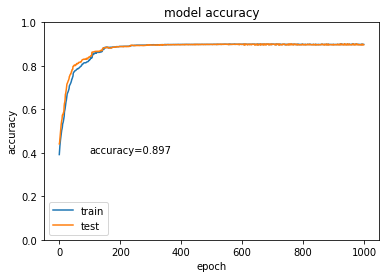

In [19]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.text(100,0.4,"accuracy="+str(round(preds[1],3)))
plt.ylim((0, 1)) # Uncomment this when showing you model for pay raise
plt.legend(['train', 'test'], loc='best')
plt.show()
#plt.savefig("accuary.png")

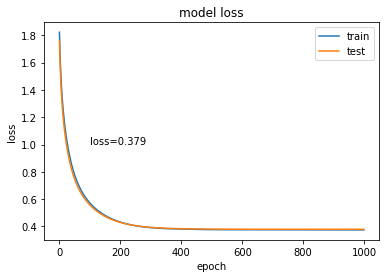

In [20]:
plt.plot(history.history["loss"])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.text(100,1,"loss="+str(round(preds[0],3)))
plt.legend(['train', 'test'], loc="best")
plt.show()
#plt.savefig("loss.png")

## Check the weight and bias

In [26]:
picmodel=load_model("./numbers_model_20200729.h5")

In [27]:
kernel_weights=np.squeeze(picmodel.get_weights())
#print(kernel_weights.flatten())
a1=np.squeeze(kernel_weights)[0:3,0:6].flatten()
print(kernel_weights)
N=abs(a1.flatten())[np.argmax(abs(a1.flatten()))]
print(N)
a1_nor=a1.flatten()/N
print(a1_nor)

[[-2.2370937   4.0372505  -0.46092707  2.7716234   1.9990354   1.3810484 ]
 [ 2.5544446  -9.737631    4.1944613  -0.67676365  2.3775668   0.61356187]
 [ 1.9398158   5.609935    3.6054544  -4.407678    1.3737689   2.317842  ]]
9.737631
[-0.22973695  0.41460297 -0.04733462  0.28463015  0.2052897   0.14182591
  0.2623271  -1.          0.43074763 -0.06949983  0.24416275  0.06300936
  0.19920819  0.5761088   0.3702599  -0.45264378  0.14107835  0.23802936]


In [28]:
picmodel.summary()

Model: "JSmodel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 10, 10, 1)]       0         
_________________________________________________________________
zero_padding2d_4 (ZeroPaddin (None, 12, 12, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 2, 1)           18        
_________________________________________________________________
activation_7 (Activation)    (None, 4, 2, 1)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8)                 0         
_________________________________________________________________
activation_8 (Activation)    (None, 8)                 0         
Total params: 18
Trainable params: 18
Non-trainable params: 0
_______________________________________________________________

In [29]:
def get_layer_output(model,x,index=0):
    layer = K.function([model.input],[model.layers[index].output])
    return layer([x])[0]

In [30]:
path="./twolayerdata_number/one/"
imlist=os.listdir(path)
#rlist=random.sample(imlist,1000)
one_t=[]
One_t=[]
fn_t=[]
for elef in imlist:
    input_y=np.load("./twolayerdata_number/one/"+elef)
    input_y=input_y[0][1:11,1:11]
    input_x = np.expand_dims(input_y,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_4 = get_layer_output(picmodel,input_x,index=4)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    one_t.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_5)]=="one":
        FN_t=[]
        FN_t.append(elef)
        FN_t.append(layer_2.flatten())
        fn_t.append(FN_t)
        #print(elef,layer_4,class_names[np.argmax(layer_5)])
        One_t.append(elef) 
one1=collections.Counter(one_t)
print(len(one_t),collections.Counter(one_t))

1000 Counter({'one': 989, 'five': 5, 'three': 4, 'two': 2})


In [31]:
path="./twolayerdata_number/two/"
imlist=os.listdir(path)
#rlist=random.sample(imlist,1000)
two_t=[]
Two_t=[]
Tow_t=[]
for elef in imlist:
    input_y=np.load("./twolayerdata_number/two/"+elef)
    input_y=input_y[0][1:11,1:11]
    input_x = np.expand_dims(input_y,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_4 = get_layer_output(picmodel,input_x,index=4)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    two_t.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_5)]=="two":
        FN_t=[]
        FN_t.append(elef)
        FN_t.append(layer_2.flatten())
        Tow_t.append(FN_t)
        #print(elef,layer_4,class_names[np.argmax(layer_5)])
        Two_t.append(elef)
two1=collections.Counter(two_t)
print(len(two_t),collections.Counter(two_t))

1000 Counter({'two': 875, 'four': 93, 'six': 21, 'five': 10, 'three': 1})


In [33]:
path="./twolayerdata_number/three/"
imlist=os.listdir(path)
#rmlist=random.sample(imlist,1000)
three_t=[]
Three_t=[]
eerhT_t=[]
for elef in imlist:
    input_y=np.load("./twolayerdata_number/three/"+elef)
    input_y=input_y[0][1:11,1:11]
    input_x = np.expand_dims(input_y,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_4 = get_layer_output(picmodel,input_x,index=4)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    three_t.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_5)]=="three":
        FN_t=[]
        FN_t.append(elef)
        FN_t.append(layer_2.flatten())
        eerhT_t.append(FN_t)
        #print(elef,layer_4,class_names[np.argmax(layer_5)])
        Three_t.append(elef)
three1=collections.Counter(three_t)
print(len(three_t),collections.Counter(three_t))

1000 Counter({'three': 888, 'seven': 42, 'five': 39, 'four': 17, 'six': 9, 'one': 5})


In [34]:
path="./twolayerdata_number/four/"
imlist=os.listdir(path)
#rmlist=random.sample(imlist,1000)
four_t=[]
Four_t=[]
rouF_t=[]
for elef in imlist:
    input_y=np.load("./twolayerdata_number/four/"+elef)
    input_y=input_y[0][1:11,1:11]
    input_x = np.expand_dims(input_y,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_4 = get_layer_output(picmodel,input_x,index=4)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    four_t.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_5)]=="four":
        FN_t=[]
        FN_t.append(elef)
        FN_t.append(layer_2.flatten())
        rouF_t.append(FN_t)
        #print(elef,layer_4,class_names[np.argmax(layer_5)])
        Four_t.append(elef)
four1=collections.Counter(four_t)
print(len(four_t),collections.Counter(four_t))

1000 Counter({'four': 895, 'six': 55, 'five': 23, 'three': 17, 'eight': 9, 'two': 1})


In [35]:
path="./twolayerdata_number/five/"
imlist=os.listdir(path)
#rmlist=random.sample(imlist,1000)
five_t=[]
Five_t=[]
eviF_t=[]
for elef in imlist:
    input_y=np.load("./twolayerdata_number/five/"+elef)
    input_y=input_y[0][1:11,1:11]
    input_x = np.expand_dims(input_y,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_4 = get_layer_output(picmodel,input_x,index=4)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    five_t.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_5)]=="five":
        FN_t=[]
        FN_t.append(elef)
        FN_t.append(layer_2.flatten())
        eviF_t.append(FN_t)
        #print(elef,layer_4,class_names[np.argmax(layer_5)])
        Five_t.append(elef)
five1=collections.Counter(five_t)
print(len(five_t),collections.Counter(five_t))

1000 Counter({'five': 892, 'three': 39, 'seven': 29, 'two': 23, 'four': 9, 'six': 8})


In [36]:
path="./twolayerdata_number/six/"
imlist=os.listdir(path)
#rmlist=random.sample(imlist,1000)
six_t=[]
Six_t=[]
xiS_t=[]
for elef in imlist:
    input_y=np.load("./twolayerdata_number/six/"+elef)
    input_y=input_y[0][1:11,1:11]
    input_x = np.expand_dims(input_y,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_4 = get_layer_output(picmodel,input_x,index=4)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    six_t.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_5)]=="six":
        FN_t=[]
        FN_t.append(elef)
        FN_t.append(layer_2.flatten())
        xiS_t.append(FN_t)
        #print(elef,layer_4,class_names[np.argmax(layer_5)])
        Six_t.append(elef)
six1=collections.Counter(six_t)
print(len(six_t),collections.Counter(six_t))

1000 Counter({'six': 910, 'two': 39, 'four': 29, 'five': 16, 'three': 6})


In [37]:
path="./twolayerdata_number/seven/"
imlist=os.listdir(path)
#rmlist=random.sample(imlist,1000)
seven_t=[]
Seven_t=[]
neveS_t=[]
for elef in imlist:
    input_y=np.load("./twolayerdata_number/seven/"+elef)
    input_y=input_y[0][1:11,1:11]
    input_x = np.expand_dims(input_y,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_4 = get_layer_output(picmodel,input_x,index=4)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    seven_t.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_5)]=="seven":
        FN_t=[]
        FN_t.append(elef)
        FN_t.append(layer_2.flatten())
        neveS_t.append(FN_t)
        #print(elef,layer_4,class_names[np.argmax(layer_5)])
        Seven_t.append(elef)
seven1=collections.Counter(seven_t)
print(len(seven_t),collections.Counter(seven_t))

1000 Counter({'seven': 859, 'five': 61, 'three': 30, 'four': 26, 'six': 24})


In [38]:
path="./twolayerdata_number/eight/"
imlist=os.listdir(path)
#rmlist=random.sample(imlist,1000)
eight_t=[]
Eight_t=[]
thgiE_t=[]
for elef in imlist:
    input_y=np.load("./twolayerdata_number/eight/"+elef)
    input_y=input_y[0][1:11,1:11]
    input_x = np.expand_dims(input_y,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_4 = get_layer_output(picmodel,input_x,index=4)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    eight_t.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_5)]=="eight":
        FN_t=[]
        FN_t.append(elef)
        FN_t.append(layer_2.flatten())
        thgiE_t.append(FN_t)
        #print(elef,layer_4,class_names[np.argmax(layer_5)])
        Eight_t.append(elef)
eight1=collections.Counter(eight_t)
print(len(eight_t),collections.Counter(eight_t))

1000 Counter({'eight': 866, 'four': 52, 'six': 49, 'five': 15, 'three': 12, 'seven': 6})


one      989.0
two        2.0
three      4.0
four       0.0
five       5.0
six        0.0
seven      0.0
eight      0.0
dtype: float64
one      989.0
two        2.0
three      4.0
four       0.0
five       5.0
six        0.0
seven      0.0
eight      0.0
dtype: float64


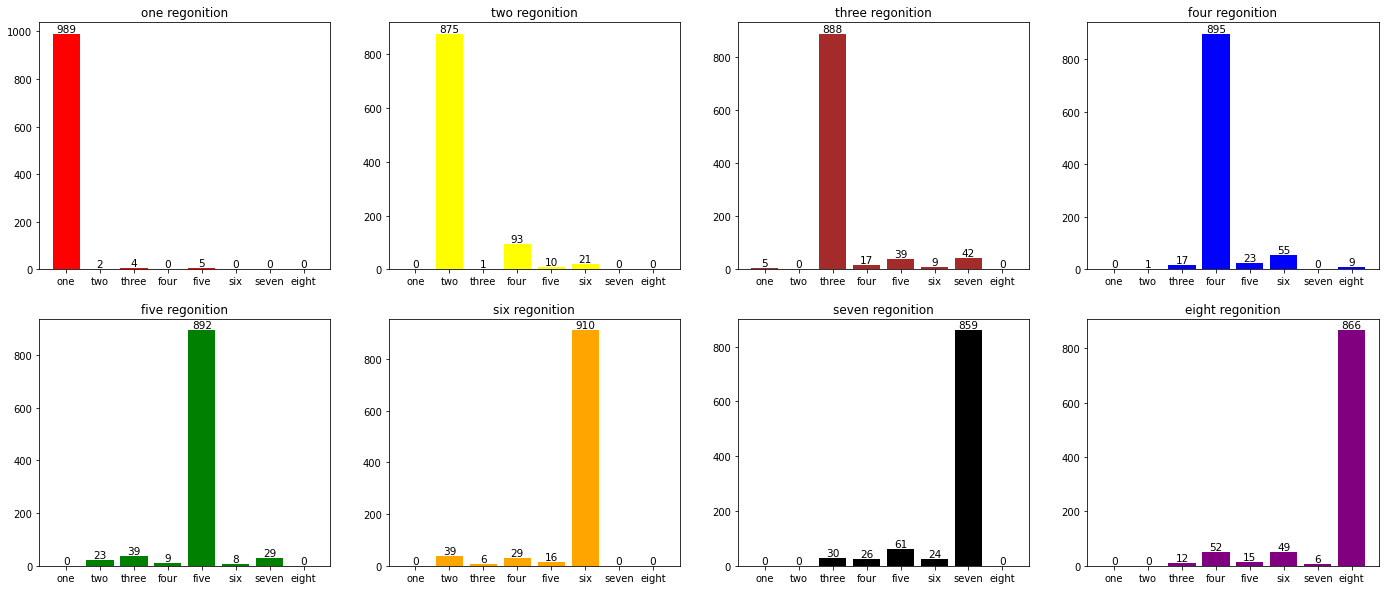

In [39]:
import pandas as pd
#dict1 = pd.DataFrame(pd.Series(f1),columns=["numbers"],index=["fire","soil","water","wood","gas","sky","human","life"])
x=["one","two","three","four","five","six","seven","eight"]
dict1=pd.Series(one1).reindex(["one","two","three","four","five","six","seven","eight"])
dict1=dict1.fillna(0)
print(dict1)
print(dict1.fillna(0))
#dict1[np.squeeze(np.argwhere(np.isnan(dict1)))]=0

dict2=pd.Series(two1).reindex(["one","two","three","four","five","six","seven","eight"])
#dict2[np.squeeze(np.argwhere(np.isnan(dict2)))]=0
dict2=dict2.fillna(0)
dict3=pd.Series(three1).reindex(["one","two","three","four","five","six","seven","eight"])
dict3=dict3.fillna(0)
#dict3[np.squeeze(np.argwhere(np.isnan(dict3)))]=0
dict4=pd.Series(four1).reindex(["one","two","three","four","five","six","seven","eight"])
dict4=dict4.fillna(0)
#dict4[np.squeeze(np.argwhere(np.isnan(dict4)))]=0
dict5=pd.Series(five1).reindex(["one","two","three","four","five","six","seven","eight"])
dict5=dict5.fillna(0)
#dict5[np.squeeze(np.argwhere(np.isnan(dict5)))]=0
dict6=pd.Series(six1).reindex(["one","two","three","four","five","six","seven","eight"])
dict6=dict6.fillna(0)
#dict6[np.squeeze(np.argwhere(np.isnan(dict6)))]=0
dict7=pd.Series(seven1).reindex(["one","two","three","four","five","six","seven","eight"])
dict7=dict7.fillna(0)
#dict7[np.squeeze(np.argwhere(np.isnan(dict7)))]=0
dict8=pd.Series(eight1).reindex(["one","two","three","four","five","six","seven","eight"])
dict8=dict8.fillna(0)
#dict8[np.squeeze(np.argwhere(np.isnan(dict8)))]=0
plt.figure(figsize=(24,10))
plt.subplot(241)
plt.bar(x,dict1,color="red")
plt.title("one regonition")
for i,j in zip(x, dict1):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict1)
plt.subplot(242)
plt.bar(x,dict2,color="yellow")
plt.title("two regonition")
for i,j in zip(x, dict2):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict2)
plt.subplot(243)
plt.bar(x,dict3,color="brown")
plt.title("three regonition")
for i,j in zip(x, dict3):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict1)
plt.subplot(244)
plt.bar(x,dict4,color="blue")
plt.title("four regonition")
for i,j in zip(x, dict4):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict1)
plt.subplot(245)
plt.bar(x,dict5,color="green")
plt.title("five regonition")
for i,j in zip(x, dict5):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict1)
plt.subplot(246)
plt.bar(x,dict6,color="orange")
plt.title("six regonition")
for i,j in zip(x, dict6):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict1)
plt.subplot(247)
plt.bar(x,dict7,color="black")
plt.title("seven regonition")
for i,j in zip(x, dict7):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict1)
plt.subplot(248)
plt.bar(x,dict8,color="purple")
plt.title("eight regonition")
for i,j in zip(x, dict8):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict1)
#list1=dict1.values.tolist()
#plt.savefig("regonition.png")
plt.show()
